# Importing Libraries

In [1]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

Saving IRIS_Flower.csv to IRIS_Flower (3).csv


# Importing DataSet

In [2]:
df = pd.read_csv("IRIS_Flower.csv")
df

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

## EDA

Here, the dataset will be cleaned, transformed and also Scaling is also done. EDA Means Exploratory Data Analysis.

In [3]:
# 1. Information of the "df"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# 2. Descripitive Analysis of the "df"

df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5

In [5]:
# 3. Checking for any Null Data in "df"

df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [6]:
# For Checking Correlation between Columns

df1 = df.drop(columns="species")
df1

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [7]:
# 4. Checking for Correlaation between the Columns

df1.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

<Axes: >

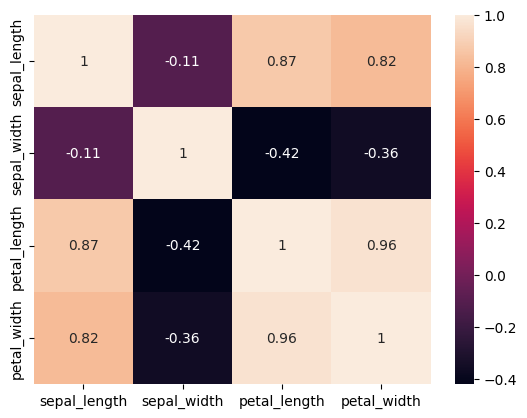

In [8]:
# 4.1 Plotting the Heatmap for Correlation

sns.heatmap(df1.corr(), annot= True)

In [9]:
# 5. Checking for Duplicate Data in "df"

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

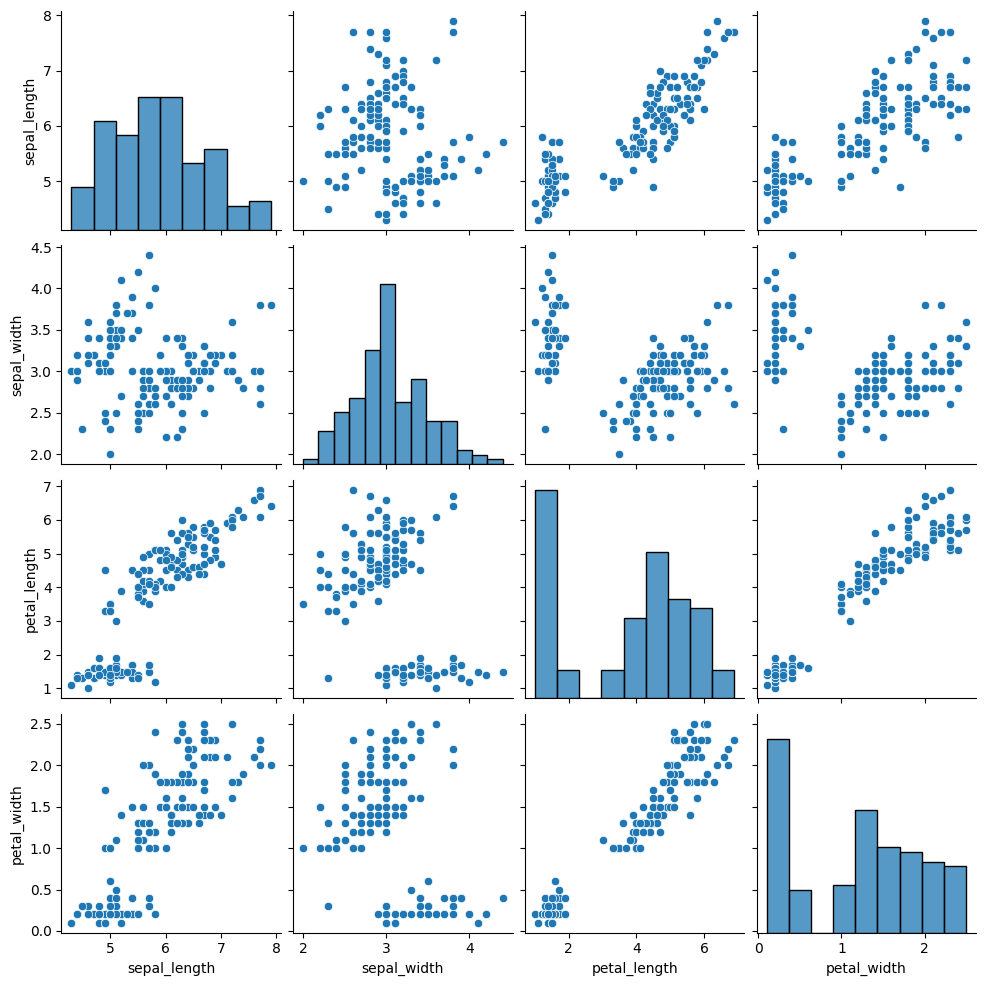

In [10]:
# 6. Plotting pairplot for "df"

sns.pairplot(df)

In [11]:
# 7. Getting Labels for the "df["species"]"

labelencoder= LabelEncoder()

df['species'] = labelencoder.fit_transform(df['species'])
df

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

In [12]:
df["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

## Here There is no data Imbalance in the Dataset. So, that we can move with the Model Validation Techniques

## Model Validation Technique

In [13]:
X = df.iloc[:,0:4]
Y = df.iloc[:,4:]

In [14]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [15]:
Y

species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size= 0.4)

In [17]:
x_train

sepal_length  sepal_width  petal_length  petal_width
123           6.3          2.7           4.9          1.8
24            4.8          3.4           1.9          0.2
25            5.0          3.0           1.6          0.2
23            5.1          3.3           1.7          0.5
94            5.6          2.7           4.2          1.3
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[90 rows x 4 columns]

In [18]:
x_test

sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4
31            5.4          3.4           1.5          0.4
64            5.6          2.9           3.6          1.3
141           6.9          3.1           5.1          2.3
68            6.2          2.2           4.5          1.5
82            5.8          2.7           3.9          1.2
110           6.5          3.2           5.1          2.0
12            4.8          3.0           1.4          0.1
36            5.5          3.5           1.3          0.2
9             4.9          3.1           1.5          0.1
19            5.1          3.8           1.5          0.3
56            6.3          3.3           4.7          1.6
104           6.5          3.0           5.8          2.2
69            5.6          2.5           3.9          1.1
55            5.7          2.8           4.5          1.3
132           6.4          2.8           5.6          2.2
29            4.7          3.2           1.6          0.2
127           6.1          3.0           4.9          1.8
26            5.0          3.4           1.6          0.4
128           6.4          2.8           5.6          2.1
131           7.9          3.8           6.4          2.0
145           6.7          3.0           5.2          2.3
108           6.7          2.5           5.8          1.8
143           6.8          3.2           5.9          2.3
45            4.8          3.0           1.4          0.3
30            4.8          3.1           1.6          0.2
22            4.6          3.6           1.0          0.2
15            5.7          4.4           1.5          0.4
65            6.7          3.1           4.4          1.4
11            4.8          3.4           1.6          0.2
42            4.4          3.2           1.3          0.2
146           6.3          2.5           5.0          1.9
51            6.4          3.2           4.5          1.5
27            5.2          3.5           1.5          0.2
4             5.0          3.6           1.4          0.2
32            5.2          4.1           1.5          0.1
142           5.8          2.7           5.1          1.9
85            6.0          3.4           4.5          1.6
86            6.7          3.1           4.7          1.5
16            5.4          3.9           1.3          0.4
10            5.4          3.7           1.5          0.2
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5
96            5.7          2.9           4.2          1.3
105           7.6          3.0           6.6          2.1
66            5.6          3.0           4.5          1.5
0             5.1          3.5           1.4          0.2
122           7.7          2.8           6.7          2.0
67            5.8          2.7           4.1          1.0
28            5.2          3.4           1.4          0.2
40            5.0          3.5           1.3          0.3
44            5.1          3.8           1.9          0.4
60            5.0          2.0           3.5          1.0

In [19]:
y_train

species
123        2
24         0
25         0
23         0
94         1
..       ...
71         1
106        2
14         0
92         1
102        2

[90 rows x 1 columns]

In [20]:
y_test

species
73         1
18         0
118        2
78         1
76         1
31         0
64         1
141        2
68         1
82         1
110        2
12         0
36         0
9          0
19         0
56         1
104        2
69         1
55         1
132        2
29         0
127        2
26         0
128        2
131        2
145        2
108        2
143        2
45         0
30         0
22         0
15         0
65         1
11         0
42         0
146        2
51         1
27         0
4          0
32         0
142        2
85         1
86         1
16         0
10         0
81         1
133        2
137        2
75         1
109        2
96         1
105        2
66         1
0          0
122        2
67         1
28         0
40         0
44         0
60         1

## Model Building

### 1. Decision Tree Classifier

In [21]:
model_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = None)

model_1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

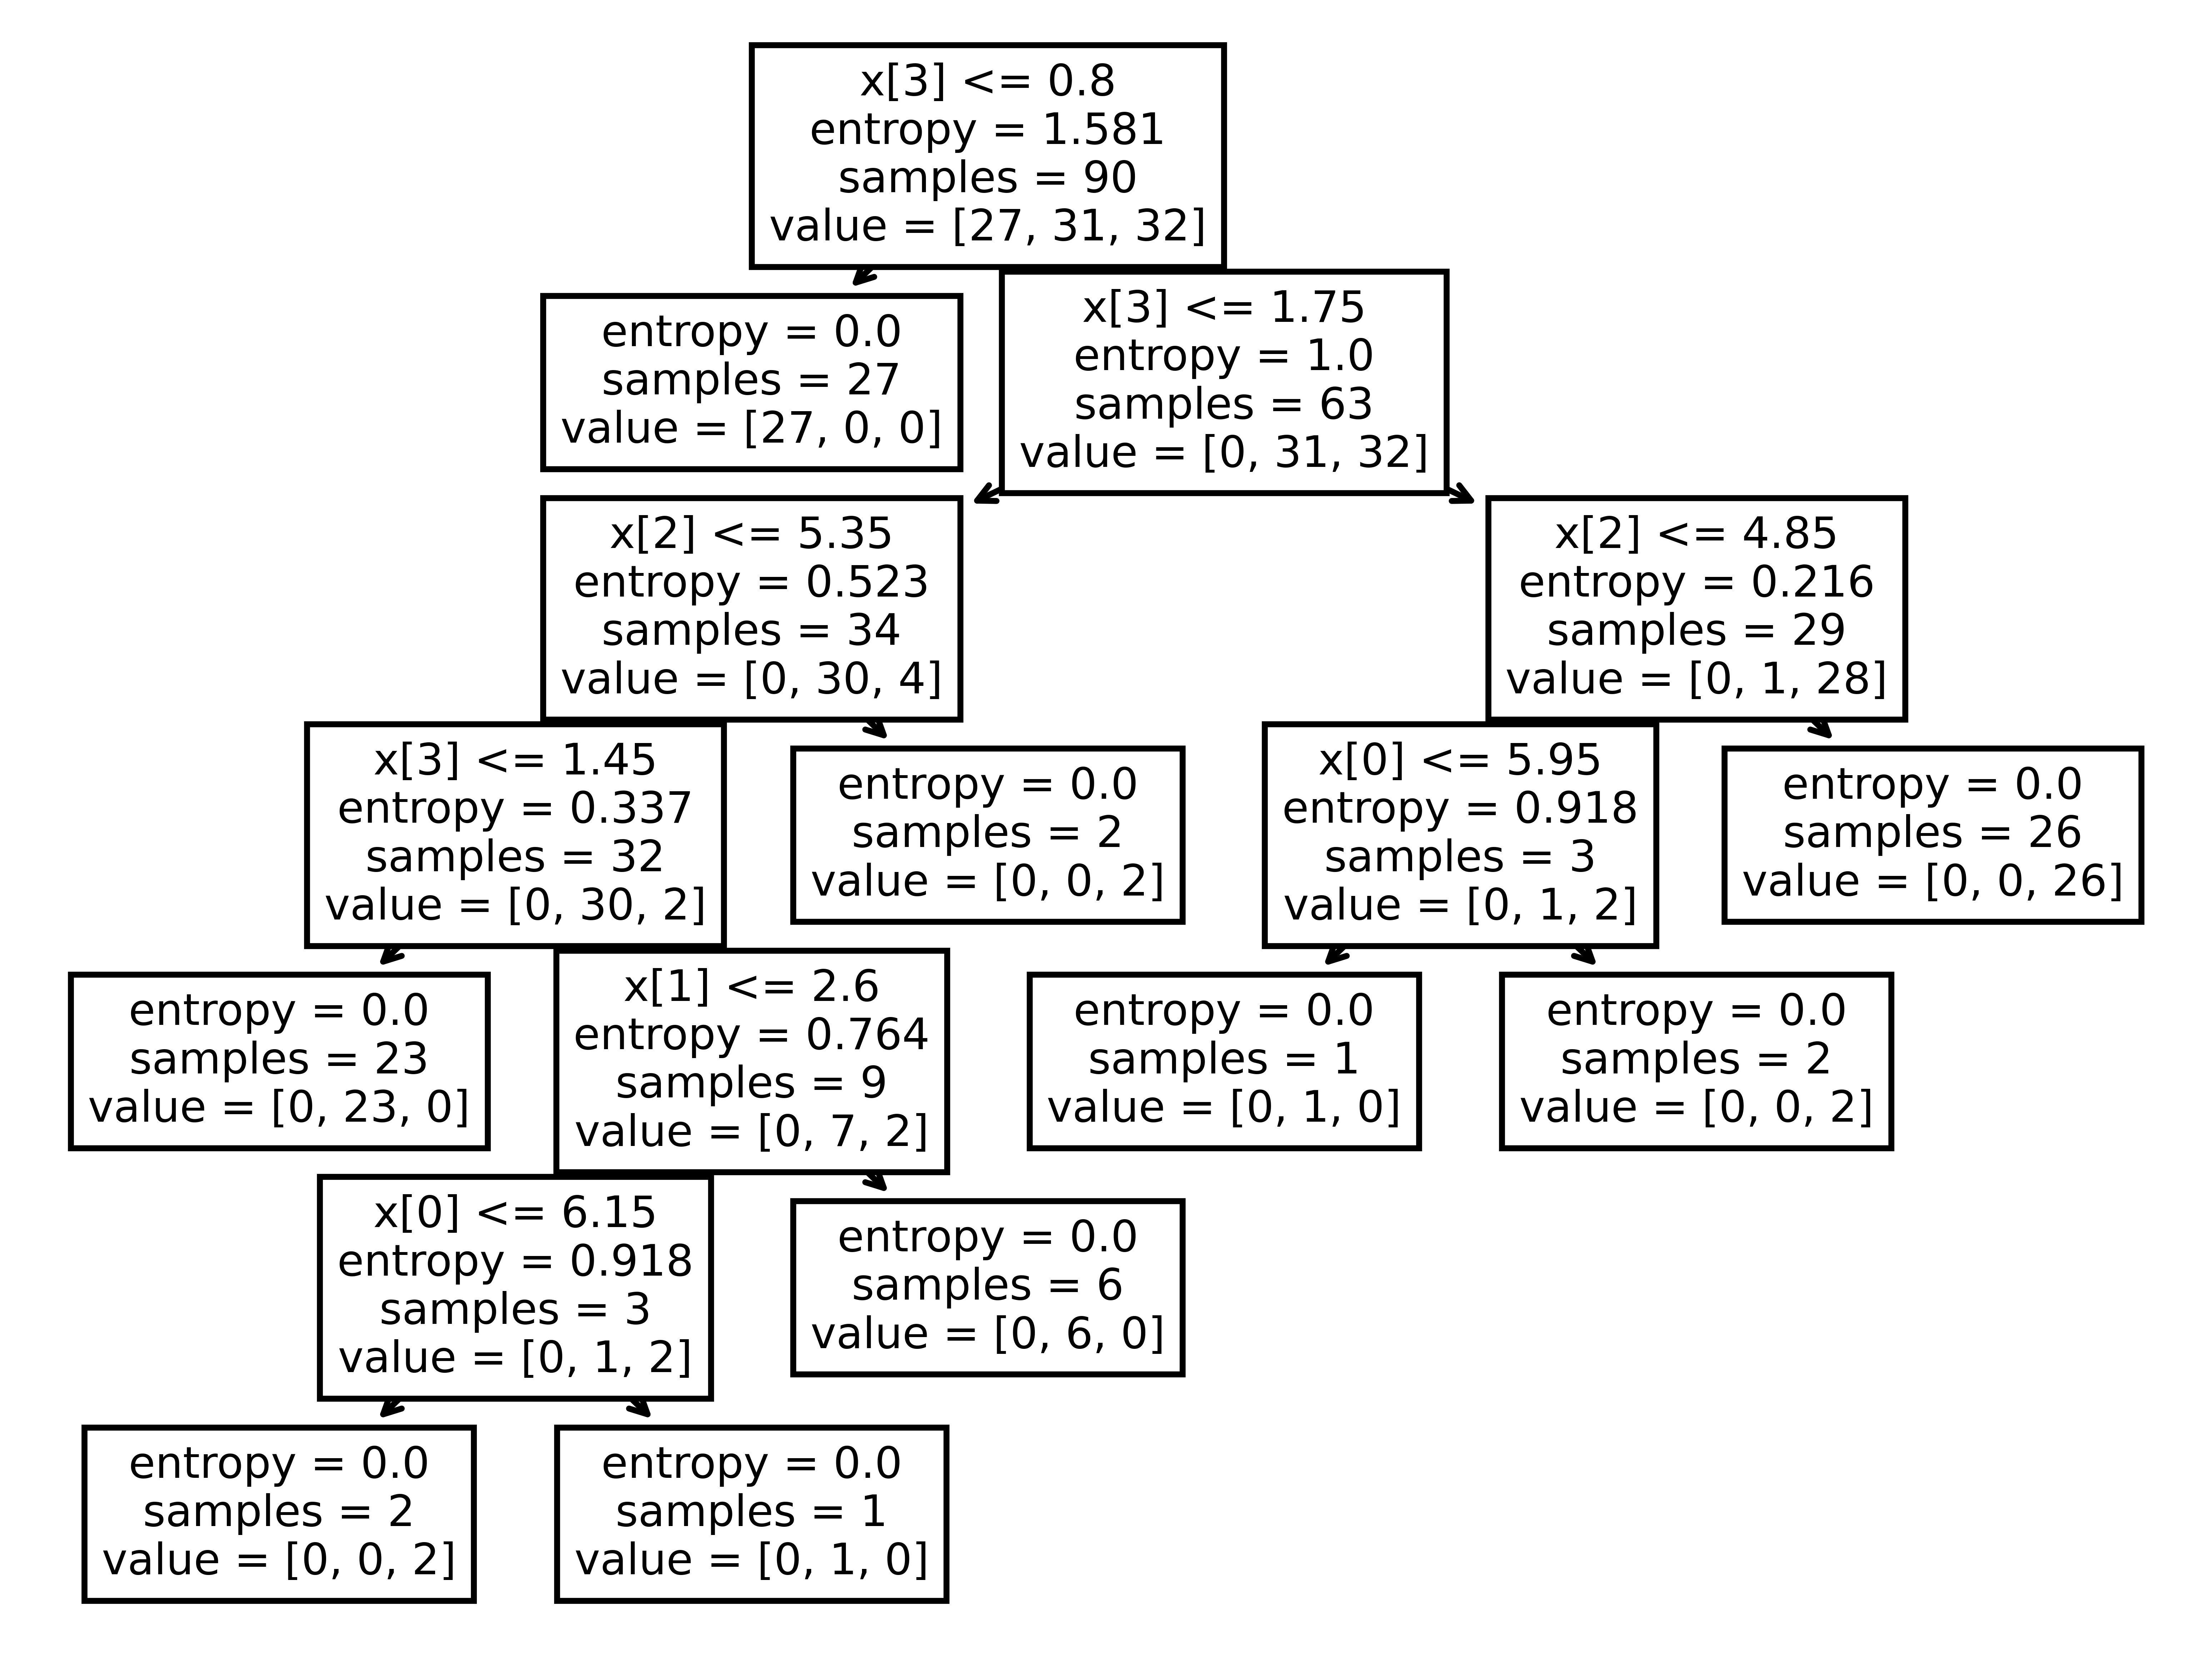

In [22]:
# Plotting the Decision Tree

plt.figure(dpi=1200)
tree.plot_tree(model_1);

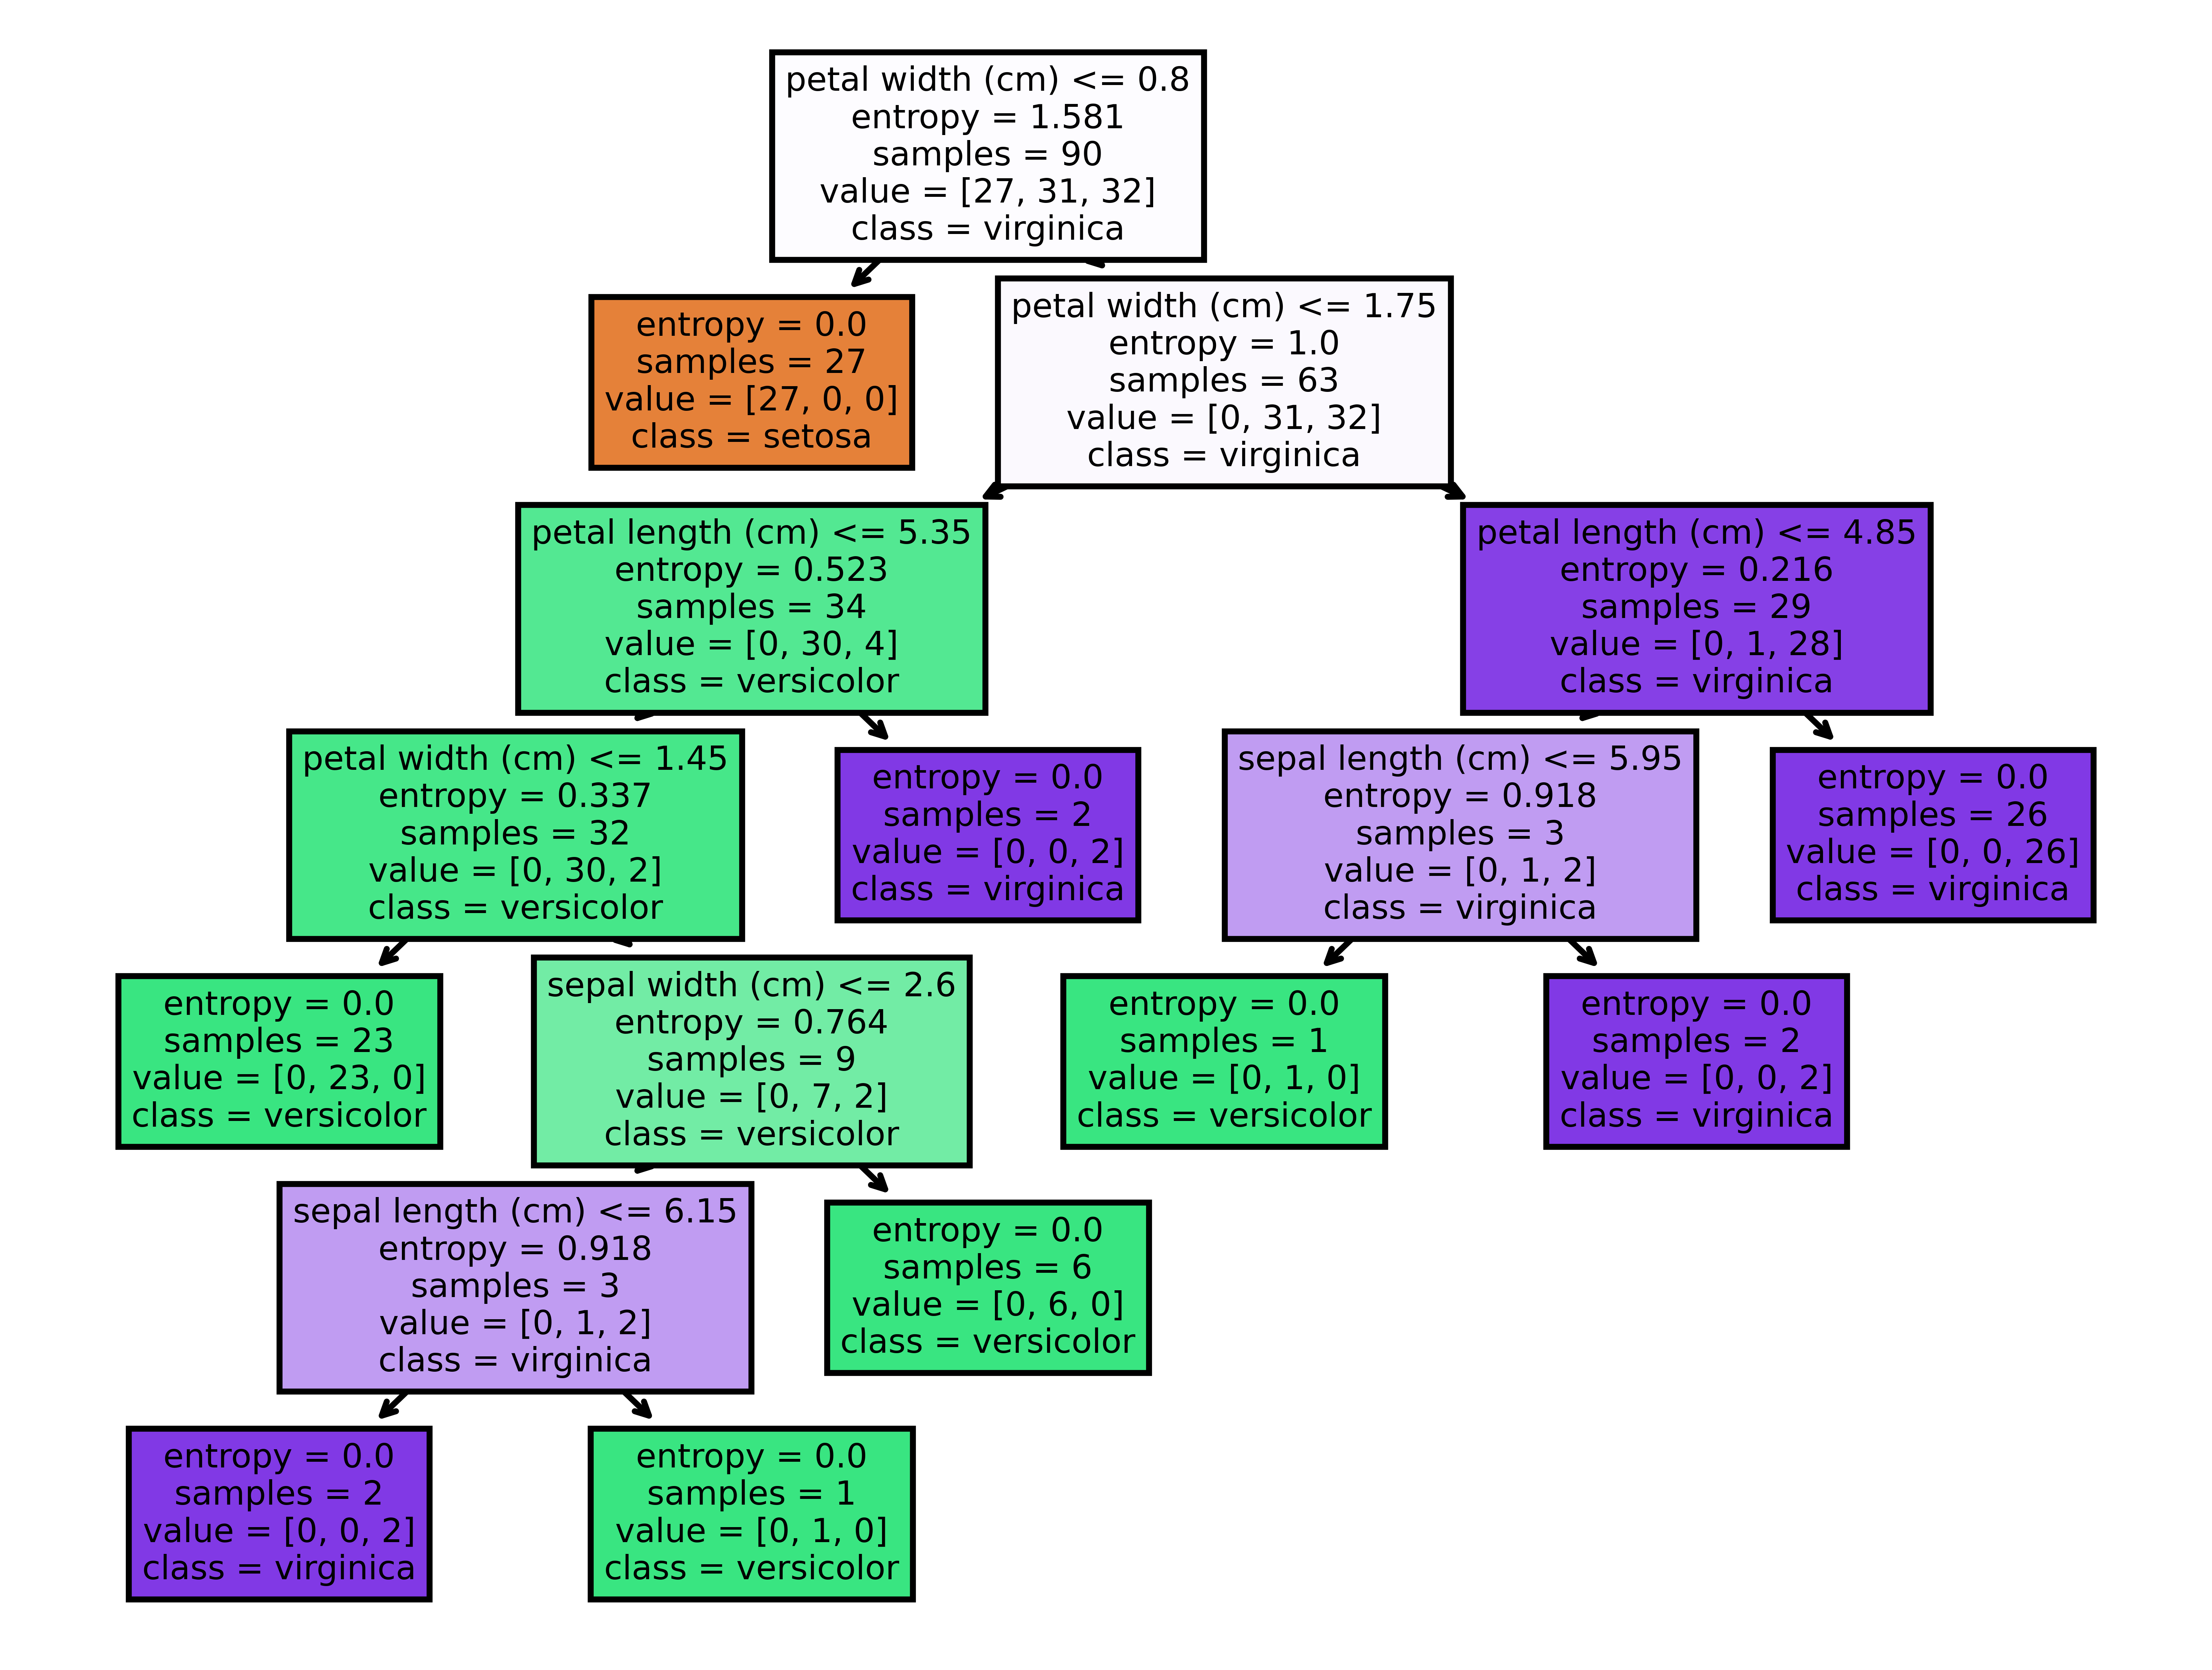

In [23]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
plt.figure(dpi=1200)
tree.plot_tree(model_1,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [24]:
# Prediction for the Test Data set

pred = model_1.predict(x_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [25]:
# Classification Report for the DataSet

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [26]:
# Accuracy
accuracy_DTE = accuracy_score(y_test,pred)
print('Accuracy:', accuracy_DTE)

Accuracy: 0.9833333333333333


### 1.1 Decision Tree Using Gini  

In [27]:
model_2 = DecisionTreeClassifier(criterion = 'gini', max_depth = None)

model_2.fit(x_train, y_train)

DecisionTreeClassifier()

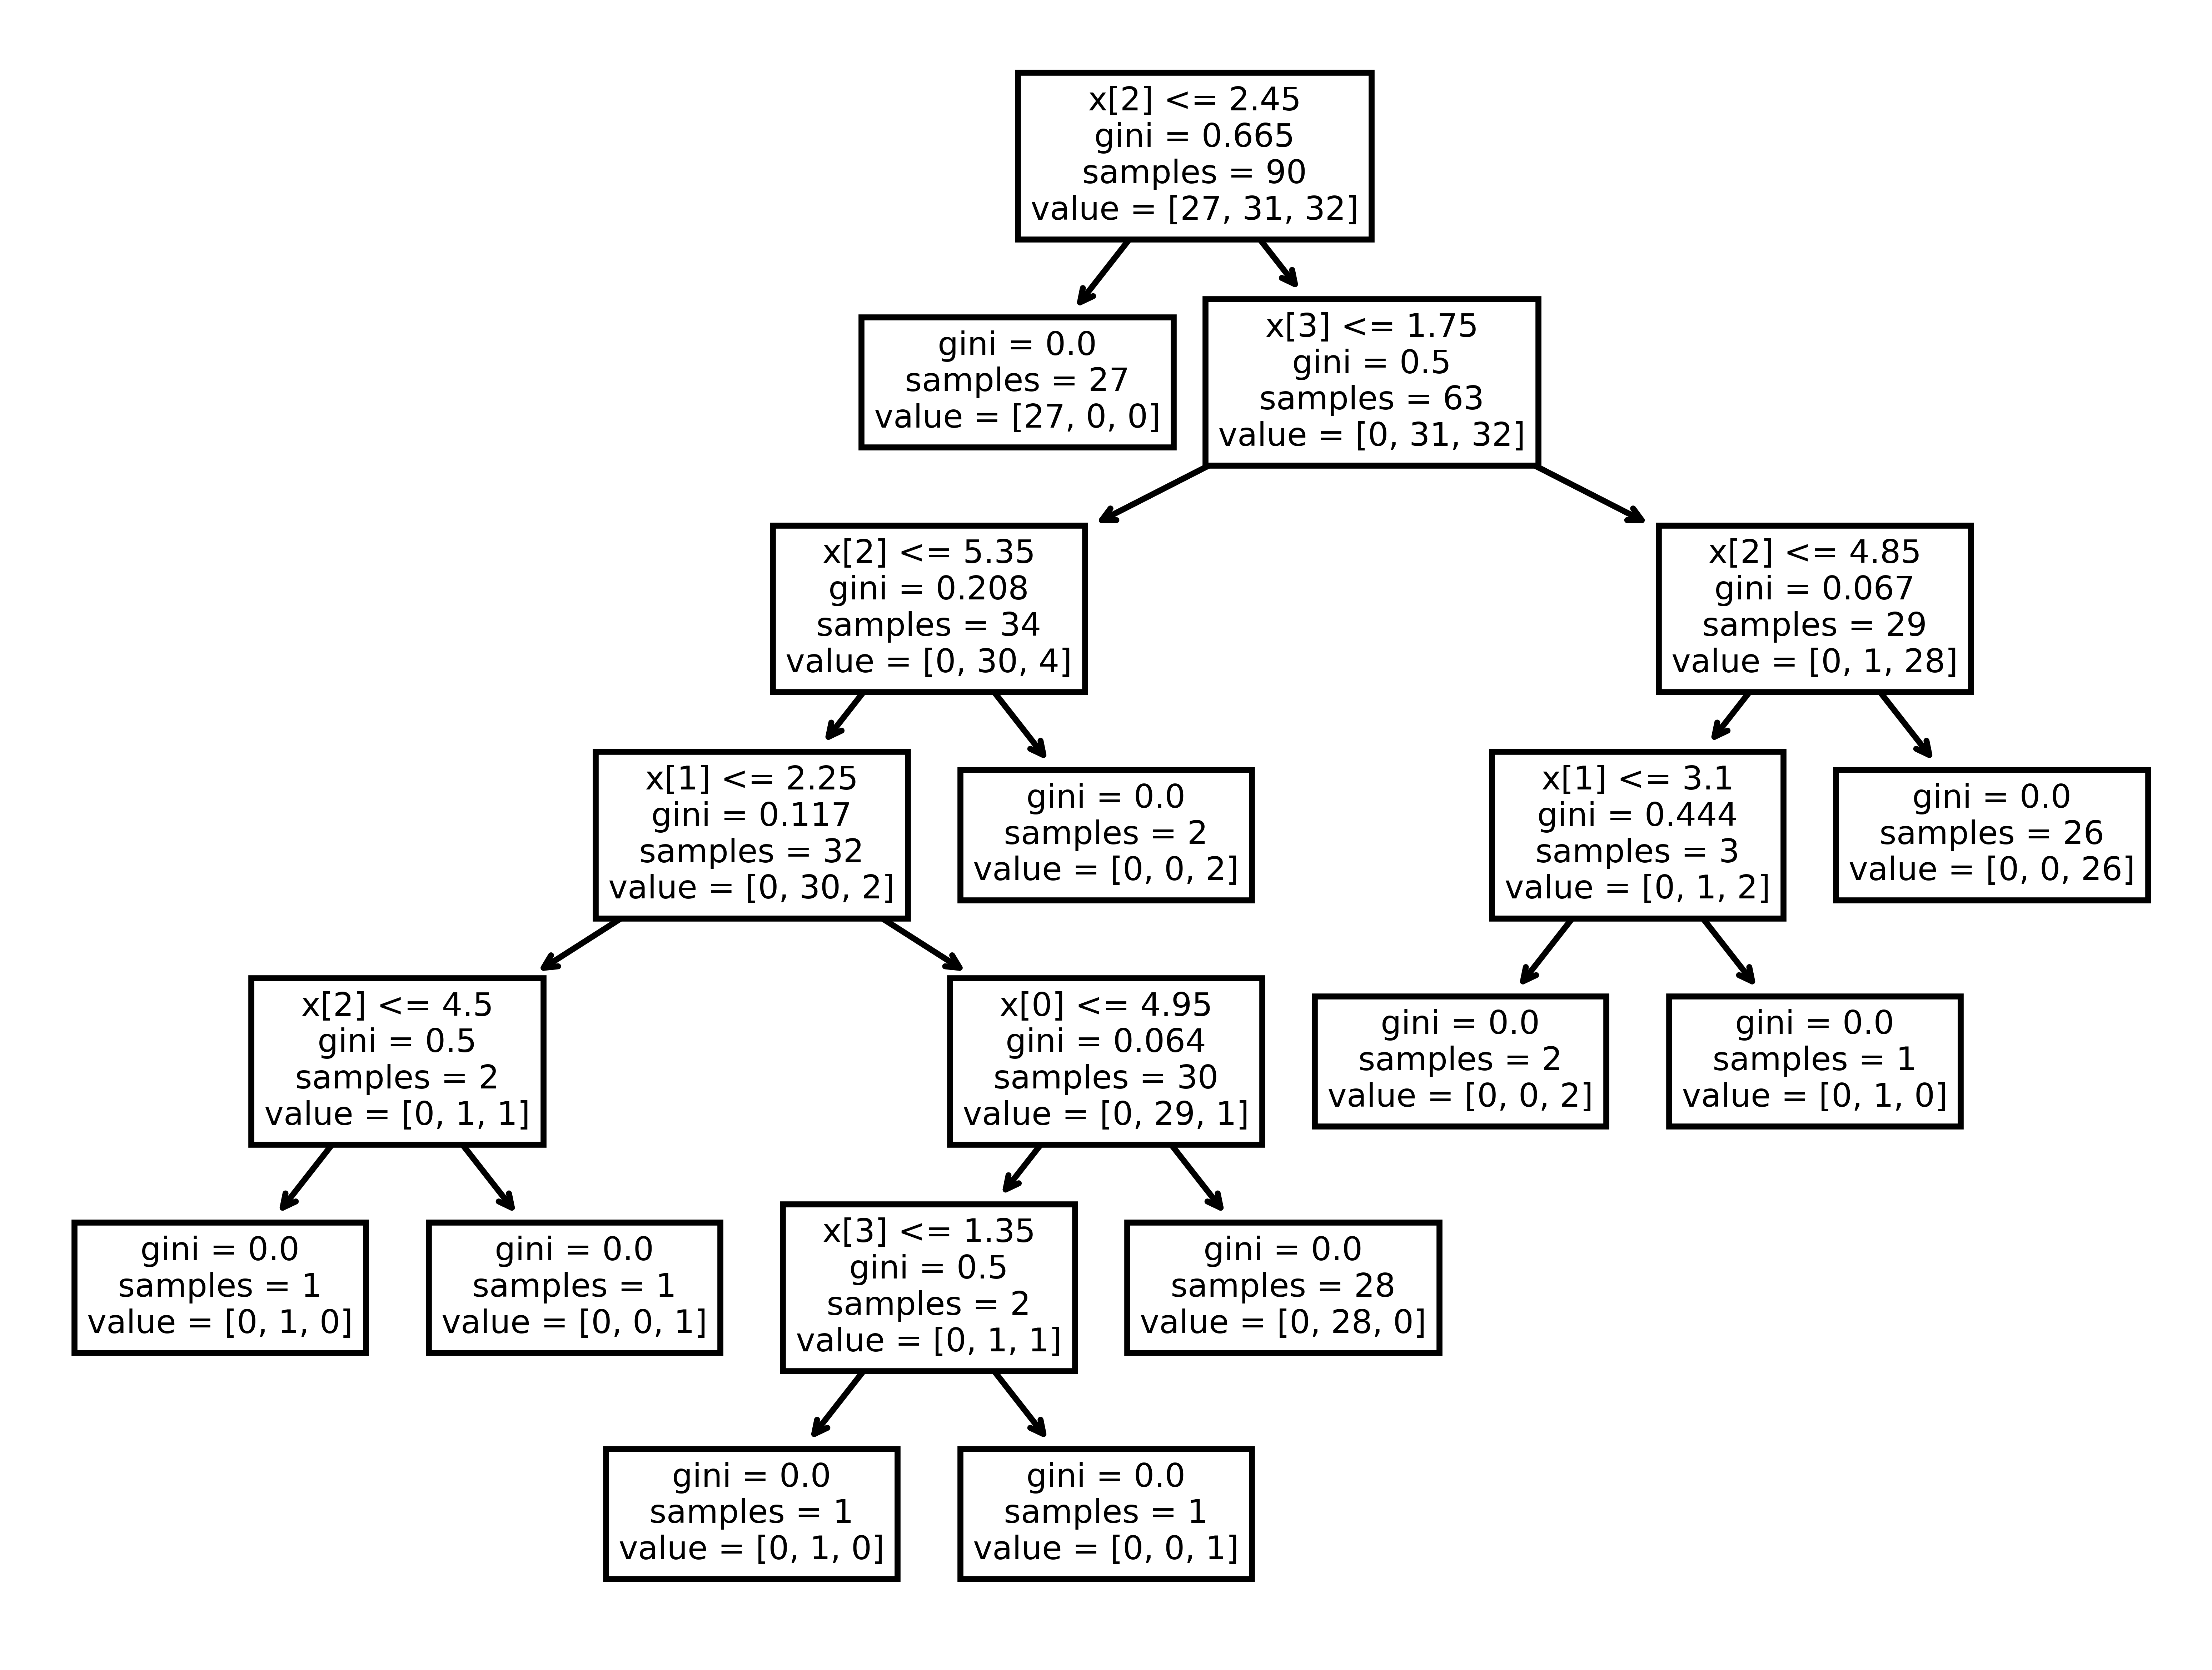

In [28]:
# Plotting the Decision Tree

plt.figure(dpi=1200)
tree.plot_tree(model_2);

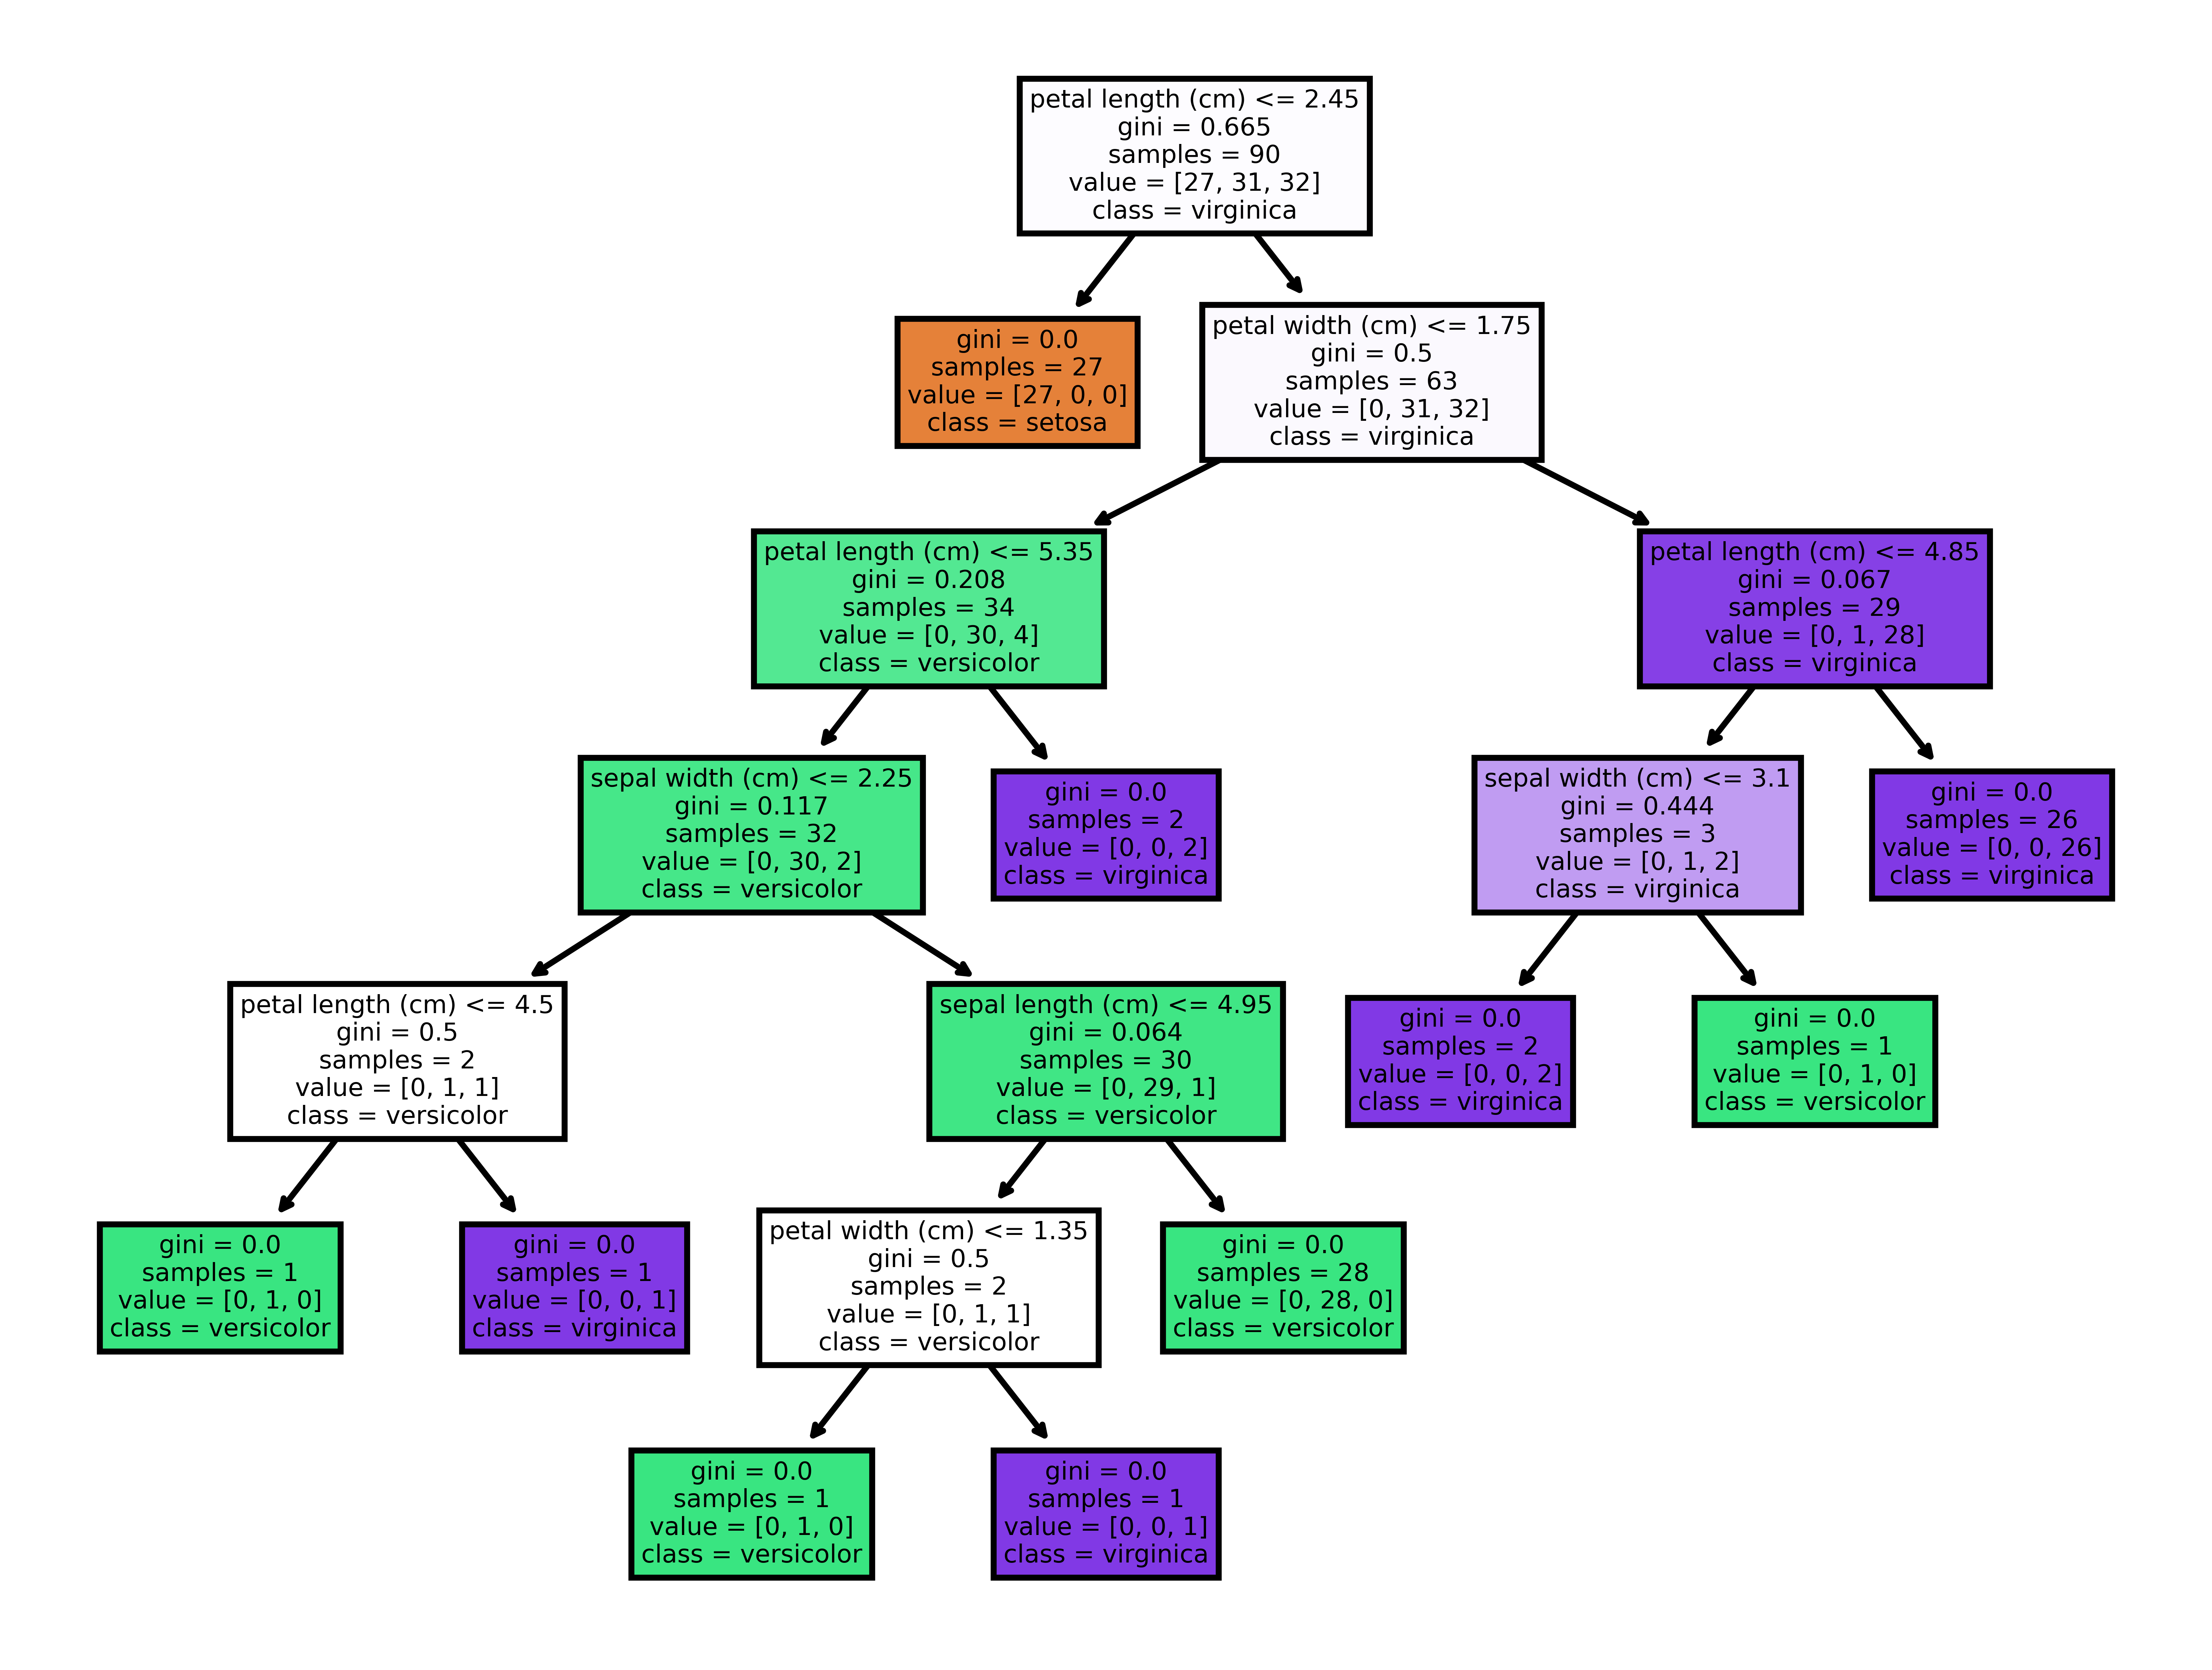

In [29]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
plt.figure(dpi=1200)
tree.plot_tree(model_2,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [30]:
# Prediction for the Test Data set

pred_1 = model_2.predict(x_test)
pred_1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [31]:
# Classification Report for the DataSet

print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [32]:
# Accuracy
accuracy_DTG = accuracy_score(y_test,pred_1)
print('Accuracy:', accuracy_DTG)

Accuracy: 0.9833333333333333


### 2. Random Forest Classifier

In [33]:
model_3 = RandomForestClassifier(n_estimators =100, random_state=42)
model_3.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
# we need to give starting point to plot a Random Forest
tree_to_plot = model_3.estimators_[0]

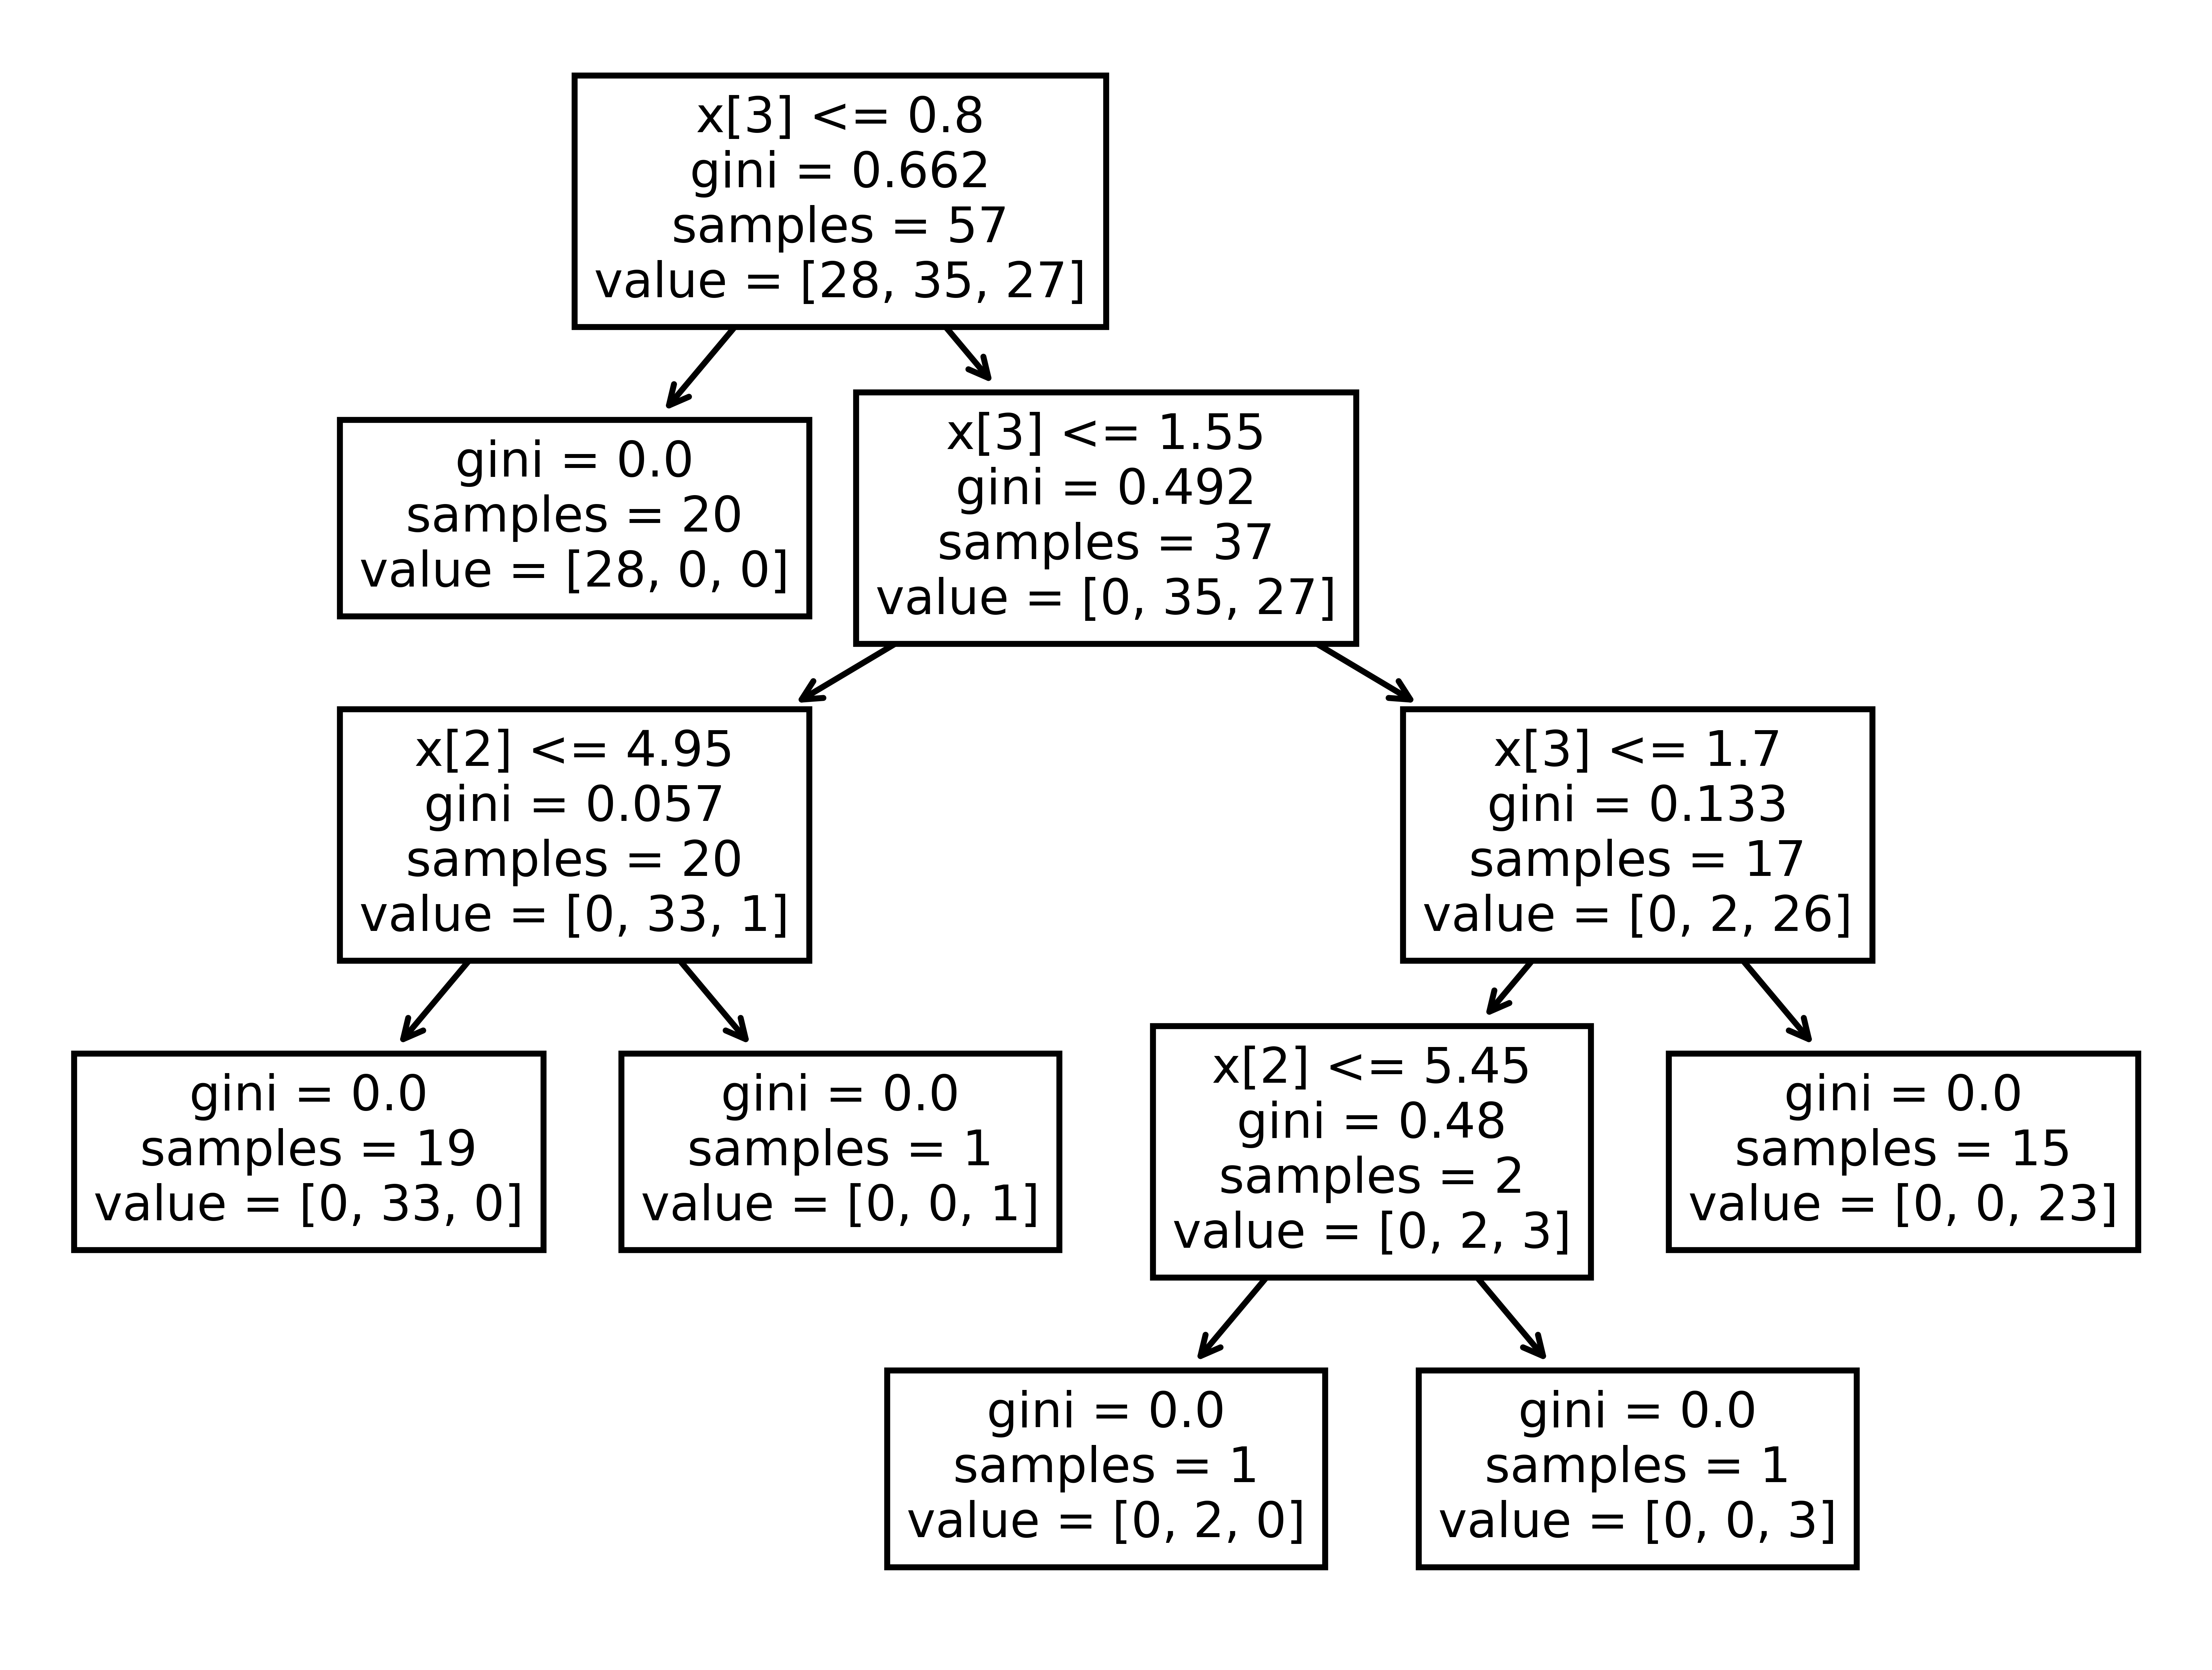

In [35]:
# Plotting the Random Forest

plt.figure(dpi=1200)
tree.plot_tree(tree_to_plot);

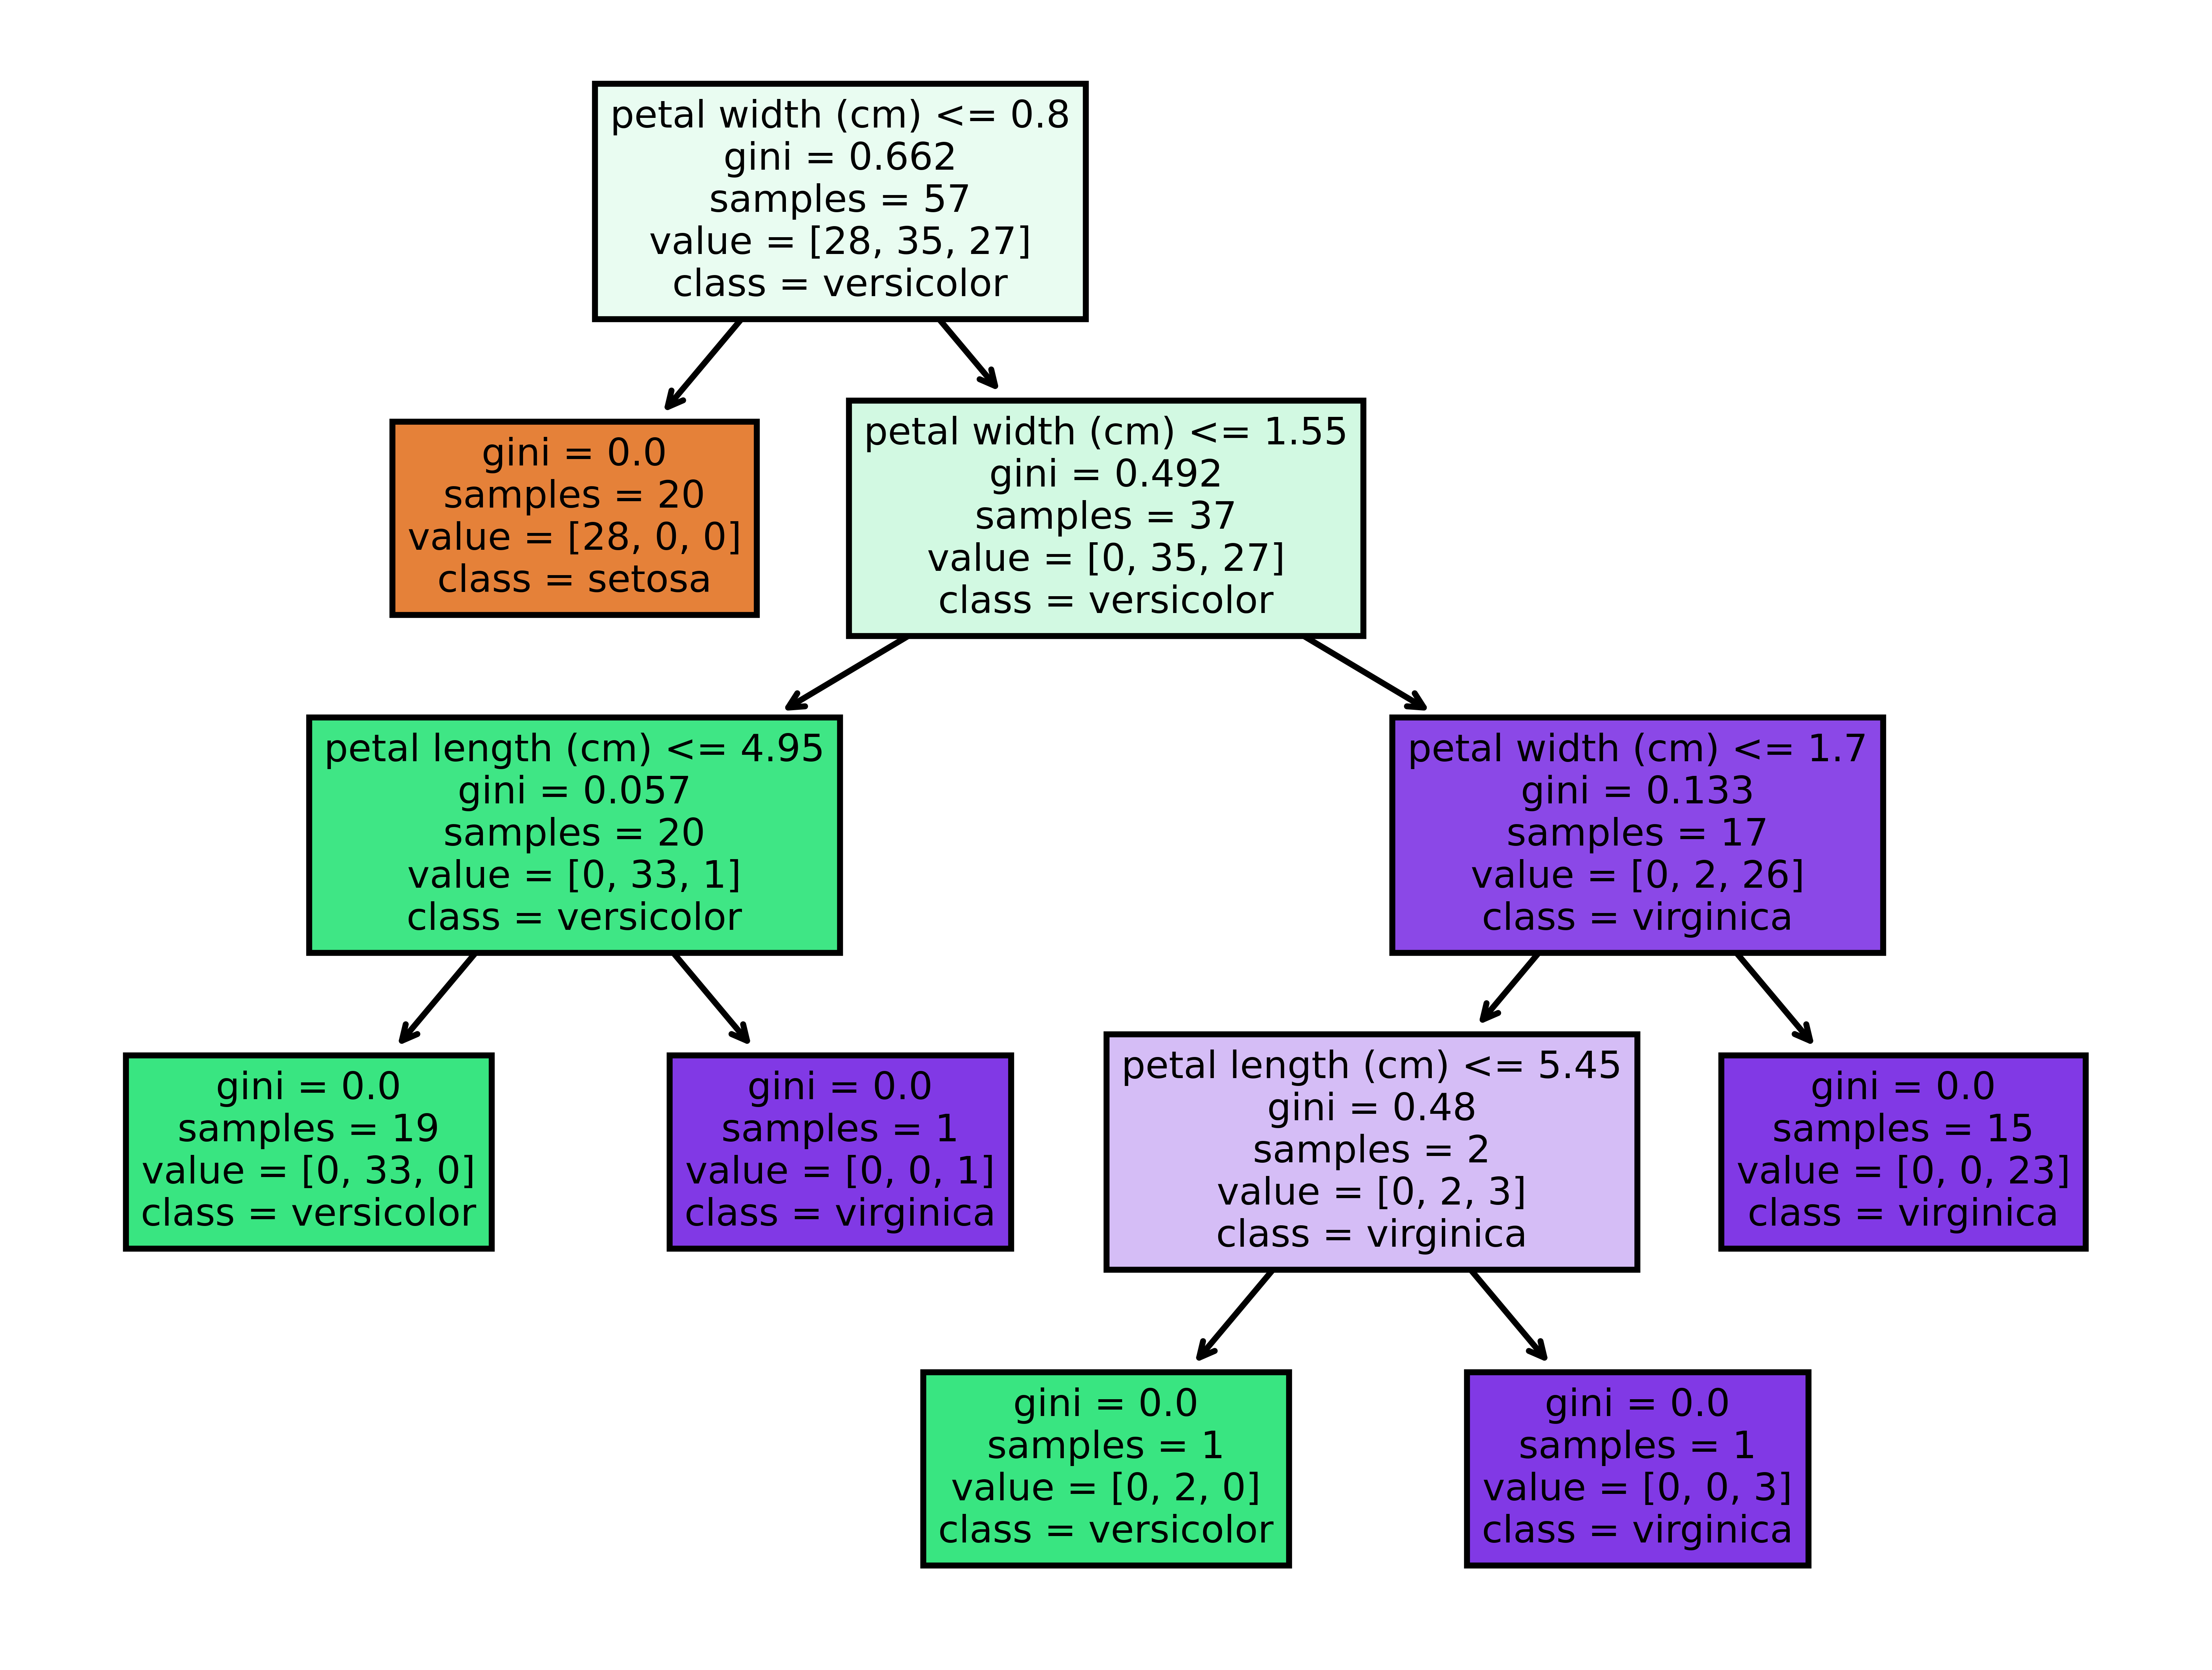

In [36]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
plt.figure(dpi=1200)
tree.plot_tree(tree_to_plot,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [37]:
# Prediction for the Test Dataset

pred_2 = model_3.predict(x_test)
pred_2

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [38]:
# Classification Report for the Random Forst Classifier

print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [39]:
# Accuarcy for the RandomForestClassifier

Accuarcy_RT = accuracy_score(y_test, pred_2)
print("Accuarcy :",Accuarcy_RT)

Accuarcy : 0.9833333333333333


### 3. K Nearest Neigbhours

In [40]:
model_4 = KNeighborsClassifier(n_neighbors = 2)
model_4.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [41]:
# Prediction
pred_3 = model_4.predict(x_test)
pred_3

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [42]:
# Classification Report For KNeighbors

print(classification_report(y_test, pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [43]:
# Accuracy for the KNeighbors

Accuracy_KNN = accuracy_score(y_test, pred_3)
print("Accuracy :", Accuracy_KNN)

Accuracy : 0.9833333333333333


### 4. Support Vector Machine (SVM)

In [44]:
model_5 = SVC()

param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(model_5,param_grid,cv=6,)
gsv.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}])

In [45]:
# Finding the best kernel and gamma and C
gsv.best_params_ , gsv.best_score_

({'kernel': 'rbf', 'gamma': 0.1, 'C': 10}, 0.9444444444444445)

In [46]:
model_5 = SVC(kernel='rbf',gamma=0.5 ,C=0.1)
model_5.fit(x_train , y_train)

SVC(C=0.1, gamma=0.5)

In [47]:
#Predicting on test data
preds_4 = model_5.predict(x_test)
preds_4

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [48]:
# Classification Report For KNeighbors

print(classification_report(y_test, preds_4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [49]:
# Accuracy for the KNeighbors

Accuracy_SVM = accuracy_score(y_test, preds_4)
print("Accuracy :", Accuracy_SVM)

Accuracy : 1.0


## **5. XGB Classifier**

In [50]:
model_6 = XGBClassifier(n_estimators=90 , max_depth=3)
model_6.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
#Predicting on test data
preds_5 = model_6.predict(x_test)
preds_5

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [52]:
# Classification Report For KNeighbors

print(classification_report(y_test, preds_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [53]:
# Accuracy for the KNeighbors

Accuracy_XGB = accuracy_score(y_test, preds_5)
print("Accuracy :", Accuracy_XGB)

Accuracy : 0.9833333333333333


## **Model Evaluation**

In [62]:
Evaluation = {
    "Models": [
        "DecisionTree Classifier with Entropy",
        "DecisionTree Classifier with Gini",
        "RandomForest Classifier",
        "KNearest Neighbours",
        "SVM Classifier",
        "XGB Classifiers"
    ],
    "Test_Accuracy(%)": [
        accuracy_DTE,
        accuracy_DTG,
        Accuarcy_RT,
        Accuracy_KNN,
        Accuracy_SVM,
        Accuracy_XGB
    ]
}

table = pd.DataFrame(Evaluation)
print(table)

                                 Models  Test_Accuracy(%)
0  DecisionTree Classifier with Entropy          0.983333
1     DecisionTree Classifier with Gini          0.983333
2               RandomForest Classifier          0.983333
3                   KNearest Neighbours          0.983333
4                        SVM Classifier          1.000000
5                       XGB Classifiers          0.983333
